# TASK 2 - Prediction Using Unsupervised Learning
From the given 'IRIS' dataset, predict the optimum number of clusters and represent it visually.

## Given Dataset:
https://bitly/3kXTdox

## Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Preprocessing

In [4]:
# Dropping the ID Column

df.drop('Id', axis=1, inplace=True)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
print(df.isnull().sum(), '\n\nNumber of duplicate rows are:', df.duplicated().sum())   # check for null and duplicates.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows are: 3


In [6]:
# Dropping Duplicates Columns

df.drop_duplicates(inplace=True)
df.shape[0]

# df.shape[0] shows the number of rows. Similarly df.shape[1] will show the number of columns.
# After dropping duplicates, 147 rows remains.

147

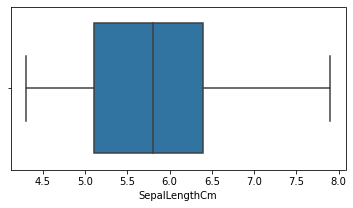

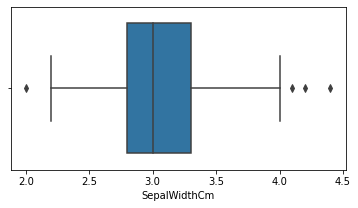

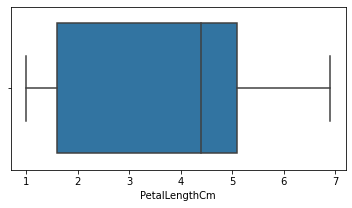

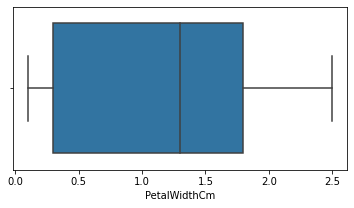

In [7]:
# Checking for Outliers through boxplot

for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

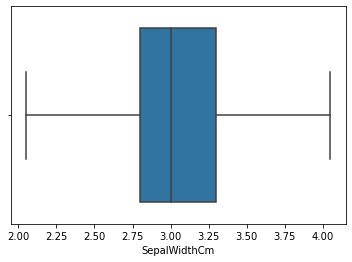

In [8]:
# Dealing with Outliers in the SepalWidthCm Column 

Q1,Q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = Q3-Q1
lower_limit = Q1-(1.5*iqr)
upper_limit = Q3+(1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_limit if x>upper_limit
                                             else lower_limit if x<lower_limit else x)
sns.boxplot(df['SepalWidthCm']);

## Understanding the Data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


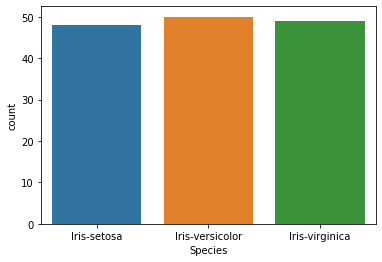

In [9]:
# Target Class

print(df.Species.value_counts())
sns.countplot(df.Species);

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [11]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

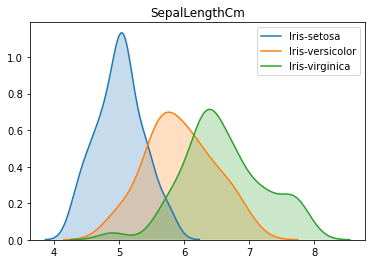

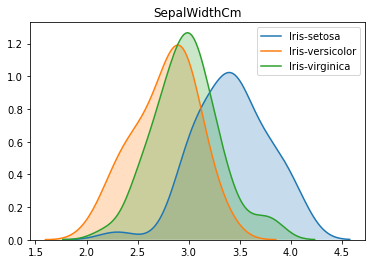

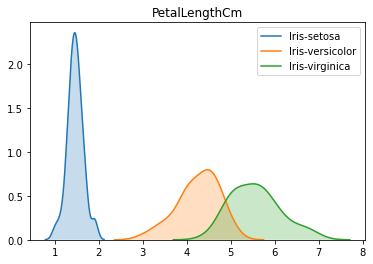

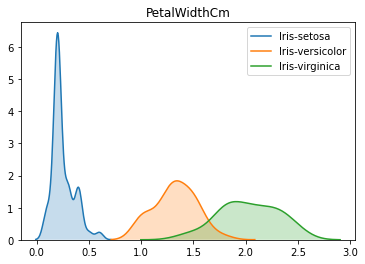

In [12]:
# Distribution of features by Species

for i in df.columns[:-1]:
    sns.kdeplot(data=df.loc[df.Species=='Iris-setosa'][i], label='Iris-setosa',shade=True)
    sns.kdeplot(data=df.loc[df.Species=='Iris-versicolor'][i], label='Iris-versicolor',shade=True)
    sns.kdeplot(data=df.loc[df.Species=='Iris-virginica'][i], label='Iris-virginica',shade=True)
    plt.title(i);
    plt.show()

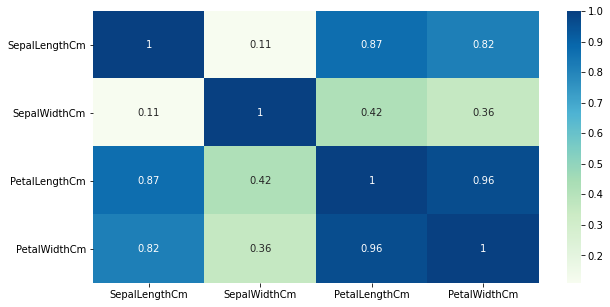

In [13]:
# Correlation Matrix

df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()), cmap='GnBu', annot=True);

# K-Means Clstering

In [14]:
from sklearn.cluster import KMeans

In [15]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(df.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

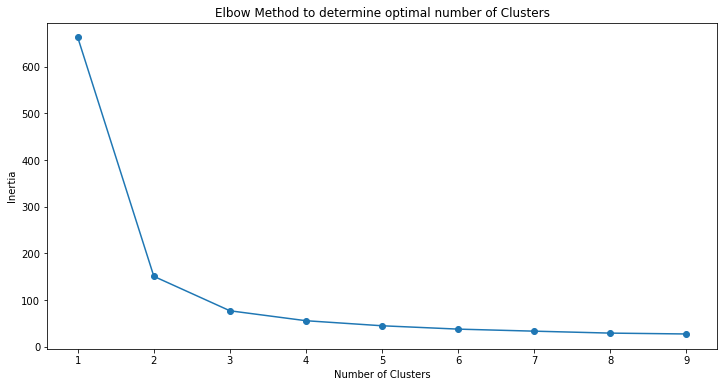

In [17]:
dt = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(dt['Cluster'],dt['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
plt.title("Elbow Method to determine optimal number of Clusters");

In [18]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [21]:
df['Cluster'] = kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [22]:
display(df['Cluster'].value_counts(), df['Species'].value_counts())

0    61
1    48
2    38
Name: Cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

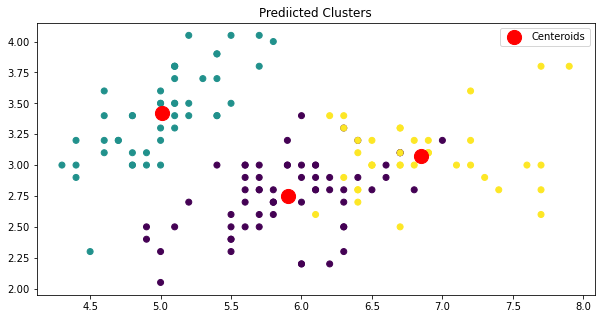

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c=df.Cluster)
plt.title("Prediicted Clusters")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label = 'Centeroids')
plt.legend()

In [27]:
# model has identified Iris-Setosa with 100% Accuracy

df.loc[df['Species']=='Iris-setosa']['Cluster'].value_counts()

1    48
Name: Cluster, dtype: int64

In [28]:
df.loc[df['Species']=='Iris-versicolor']['Cluster'].value_counts()

0    48
2     2
Name: Cluster, dtype: int64

In [29]:
df.loc[df['Species']=='Iris-virginica']['Cluster'].value_counts()

2    36
0    13
Name: Cluster, dtype: int64

In [30]:
df['Species_encoded'] = df['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [32]:
from sklearn.metrics import classification_report
print(classification_report(df['Species_encoded'], df['Cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



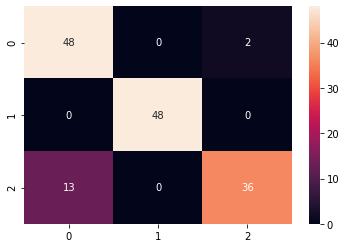

In [31]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species_encoded'], df['Cluster']), annot=True);